In [90]:
import pandas as pd
from prophet import Prophet

# Read pandas dataframe
df = pd.read_csv('gas_demand_test.csv')

# Inspect data
display(df.shape)
display(df.head())
display(df.dtypes)
display(df.isnull().any())

(206, 2)

,TIME,European Union - 27 countries (from 2020)
0,2008-01,2012060
1,2008-02,1754306
2,2008-03,1736092
3,2008-04,1372621
4,2008-05,1041214


TIME                                         object
European Union - 27 countries (from 2020)    object
dtype: object

TIME                                         False
European Union - 27 countries (from 2020)    False
dtype: bool

In [91]:
# Rename columns
df = df.rename(columns = {'TIME':'ds', 'European Union - 27 countries (from 2020)': 'y'})


# Front-fill missing data
df['y'] = df['y'].replace(':', None)
df['y'] = pd.to_numeric(df['y'])
df['y'] = df['y'].ffill()

# Timestamp conversion
df['ds'] = pd.to_datetime(df['ds'])
df['ds'] = df['ds'].dt.to_period('M').dt.to_timestamp('M')
df

,ds,y
0,2008-01-31,2012060.000
1,2008-02-29,1754306.000
2,2008-03-31,1736092.000
3,2008-04-30,1372621.000
4,2008-05-31,1041214.000
...,...,...
201,2024-10-31,940354.976
202,2024-11-30,1417925.066
203,2024-12-31,1643133.040
204,2025-01-31,1741001.241


In [92]:
holidays = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})


display(playoffs)

,holiday,ds,lower_window,upper_window
0,playoff,2008-01-13,0,1
1,playoff,2009-01-03,0,1
2,playoff,2010-01-16,0,1
3,playoff,2010-01-24,0,1
4,playoff,2010-02-07,0,1
5,playoff,2011-01-08,0,1
6,playoff,2013-01-12,0,1
7,playoff,2014-01-12,0,1
8,playoff,2014-01-19,0,1
9,playoff,2014-02-02,0,1


In [93]:
# Instantiate a Prophet object
m = Prophet(
    #changepoint_prior_scale=adjust trend flexibility
    #changepoints= specify specific change points
    #holidays= model holidays
    #yearly_seasonality= change sensitivity of seasonality
)

#df['cap'] = 7
#df['floor'] = 0.7

# Fit dataframe into model
m.fit(df)

#Set future periods for prediction 
future = m.make_future_dataframe(24, 'ME')

#Set maximum capacity
#future['cap'] = 7
#future['floor'] = 0.7


future.tail()

23:40:54 - cmdstanpy - INFO - Chain [1] start processing
23:40:55 - cmdstanpy - INFO - Chain [1] done processing


,ds
225,2026-10-31
226,2026-11-30
227,2026-12-31
228,2027-01-31
229,2027-02-28


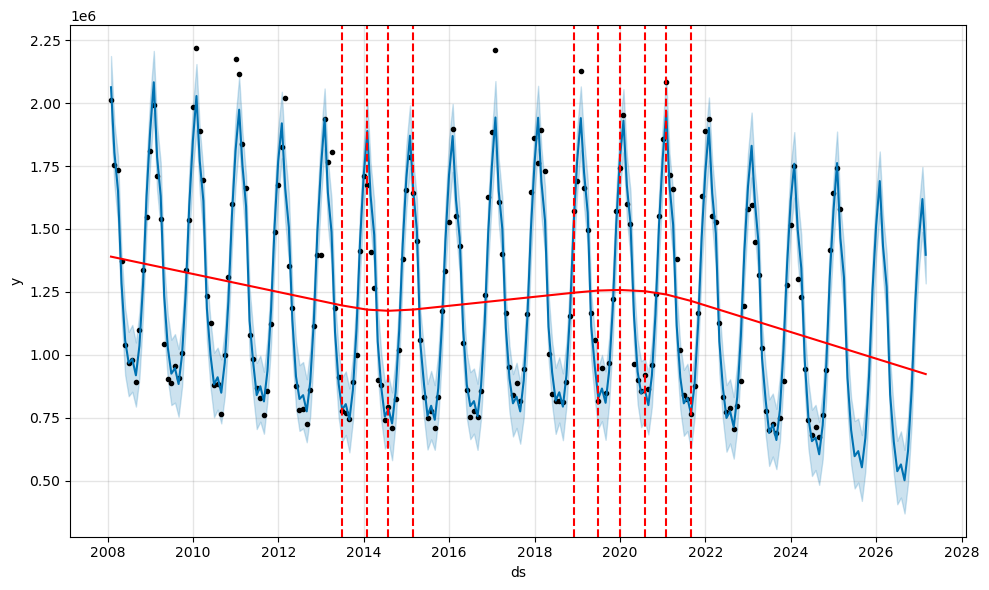

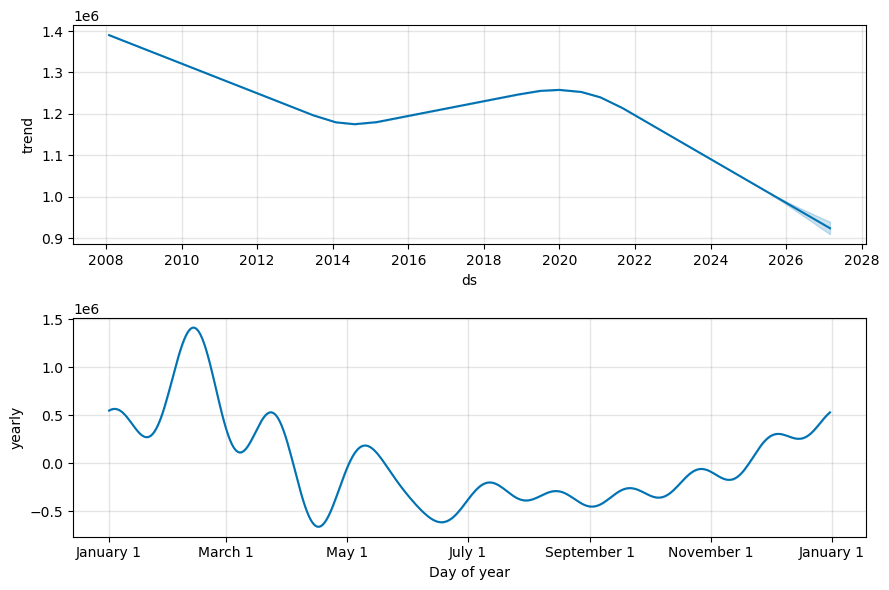

In [94]:
#Make predictions for future dates
from prophet.plot import add_changepoints_to_plot

forecast = m.predict(future)
fig1 = m.plot(forecast)
a = add_changepoints_to_plot(fig1.gca(), m, forecast)
fig2 = m.plot_components(forecast)